In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [2]:
# Import data (Make sure to parse dates. Consider setting index column to 'date'.)
df = df = pd.read_csv( 'fcc-forum-pageviews.csv',
                index_col= ['date'], parse_dates = ['date'])

In [3]:
# Clean data
df =df[(df['value'] >= df['value'].quantile(0.025)) & (df['value']<= df['value'].quantile(0.975))]

In [9]:
import matplotlib.dates as mdates
def draw_line_plot():
    # Draw line plot
    fig, ax =plt.subplots(figsize= (18,6))
    ax.plot(df.index, df['value'], color= 'darkred', linewidth= 3)
    ax.set_ylabel('Page Views', fontsize= 14)
    ax.set_xlabel('Date',fontsize= 14)
    ax.set_title('Daily freeCodeCamp Forum Page Views 5/2016-12/2019', fontsize= 18)
   # Generate tick positions at the start of January and July every year
    tick_positions = []
    for year in range(df.index.year.min(), df.index.year.max() +1):
        tick_positions.append(pd.Timestamp(f'{year}-07-01'))  # July of each year
        tick_positions.append(pd.Timestamp(f'{year}-01-01'))  # January of each year

     # Remove any duplicate dates and ensure the ticks are within the data range
    tick_positions = [tick for tick in tick_positions if tick >= df.index.min() and tick <= df.index.max()]
    
    ax.set_xticks(tick_positions)

    # Format ticks as 'Year-Month' (e.g., 2018-01)
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
    ax.tick_params(axis='x', labelsize=14)
    ax.tick_params(axis='y', labelsize=14)

    # Save image and return fig (don't change this part)
    fig.savefig('line_plot.png')
    return fig

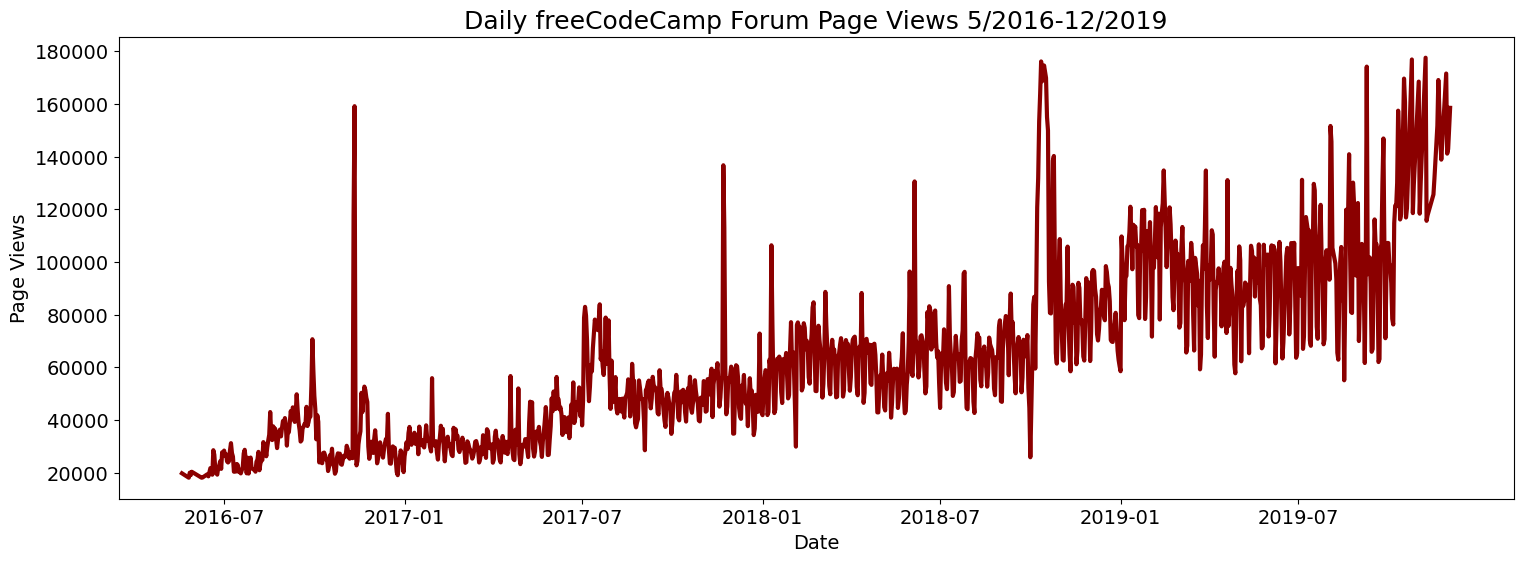

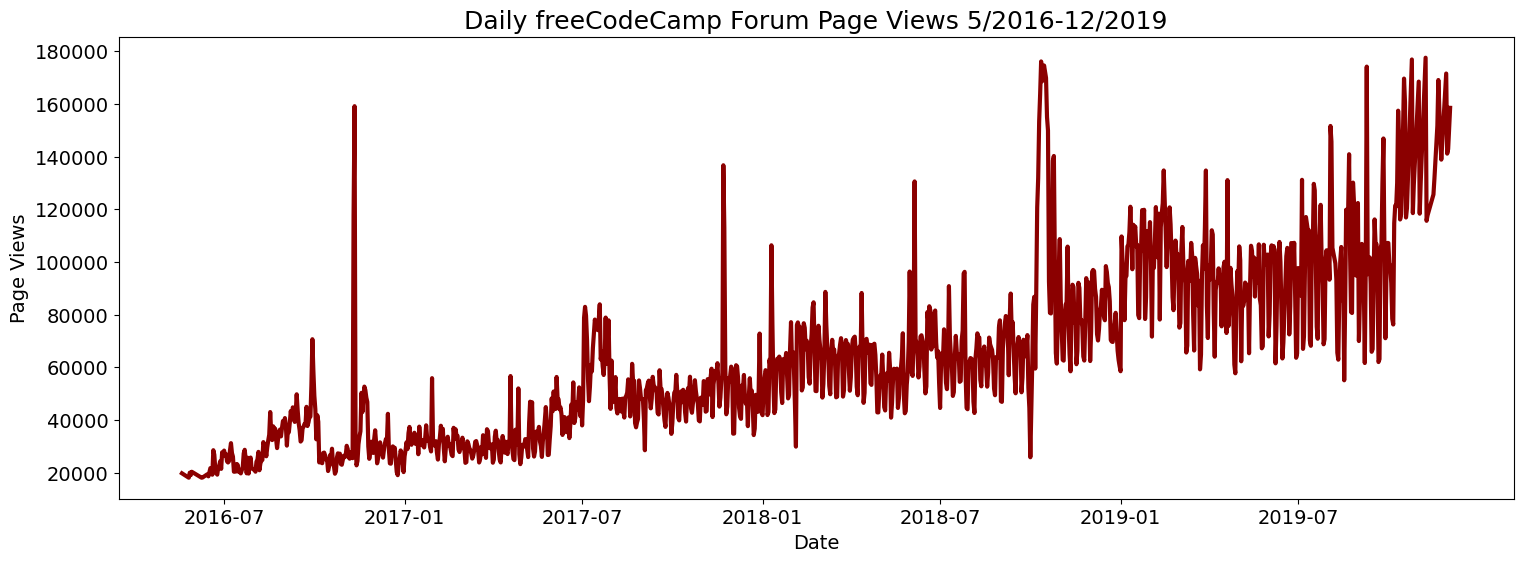

In [10]:
draw_line_plot()

In [13]:
def draw_bar_plot():
    # Copy and modify data for monthly bar plot
    df_bar =df.groupby([df.index.year, df.index.month])['value'].mean().unstack()

    # Draw bar plot
     # Create the plot
    fig, ax = plt.subplots(figsize=(18, 10))
    df_bar.plot(kind='bar', ax=ax, width=0.8)
    
    # Set the labels and title
    ax.set_xlabel('Years', fontsize= 18)
    ax.set_ylabel('Average Page Views',fontsize= 18)

    
    # Add legend with title
    ax.legend(title='Months', labels=[
        'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
        'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'
    ])

    ax.tick_params(axis='x', labelsize=16, rotation=90)  # Rotate x-axis labels for clarity
    ax.tick_params(axis='y', labelsize=16)


    # Save image and return fig (don't change this part)
    fig.savefig('bar_plot.png')
    return fig

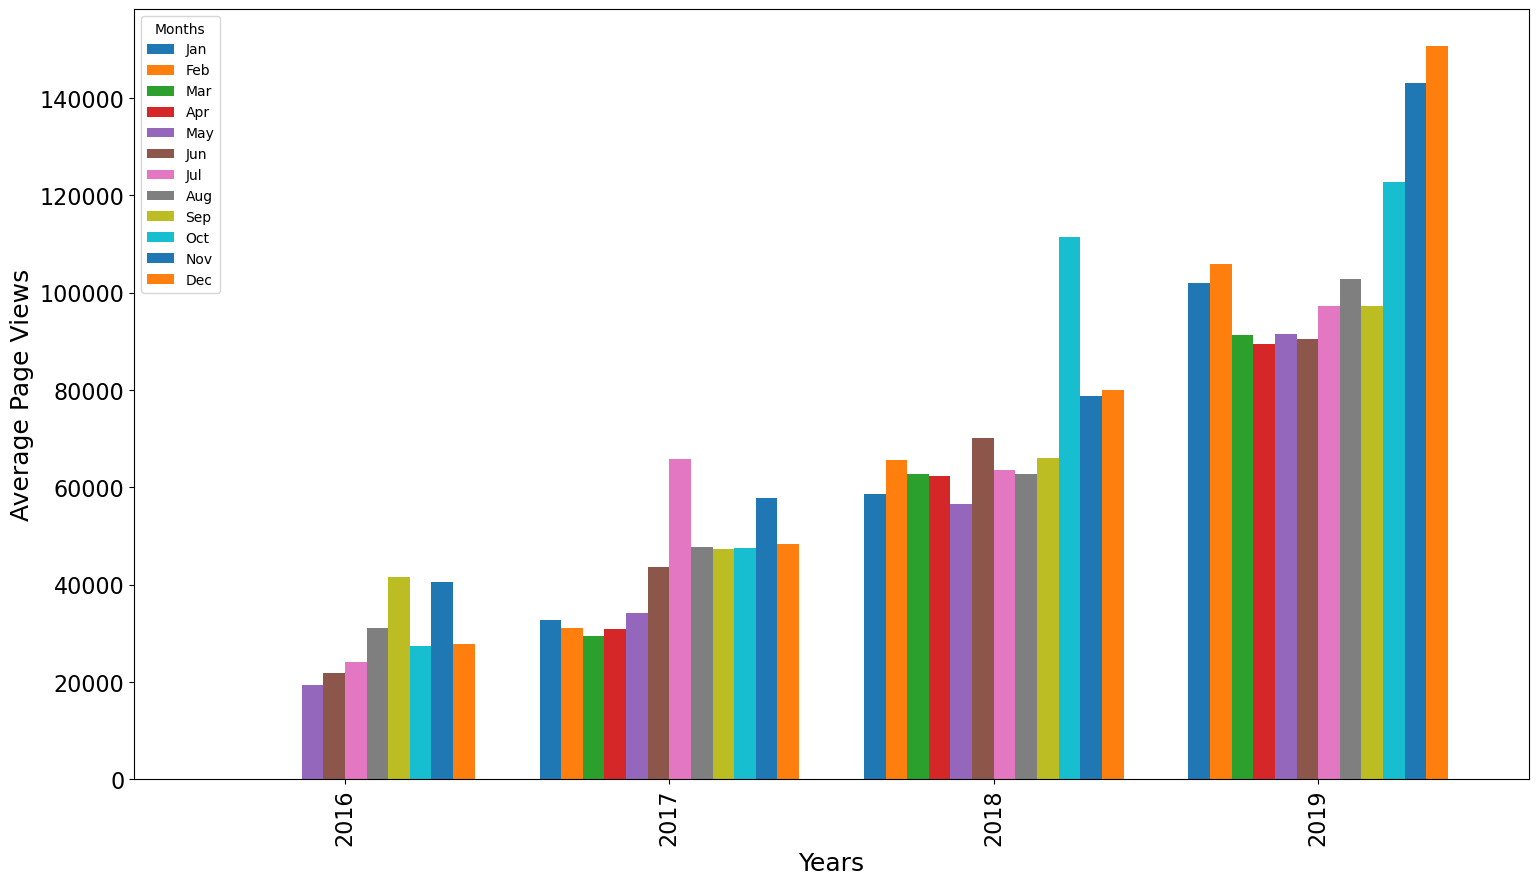

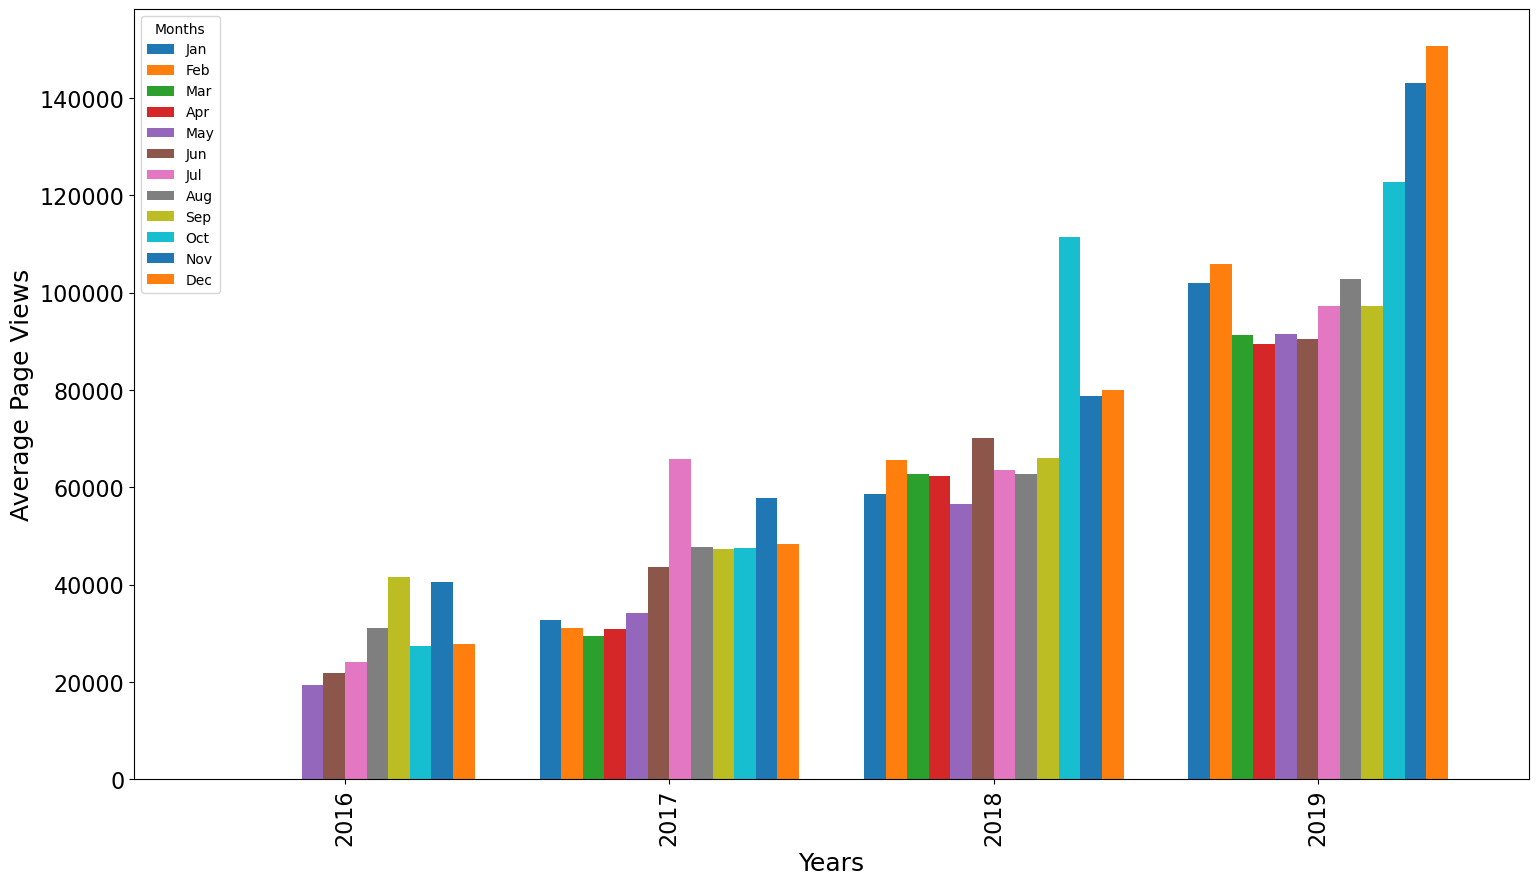

In [14]:
draw_bar_plot()

In [15]:
def draw_box_plot():
    # Prepare data for box plots (this part is done!)
    df_box = df.copy()
    df_box.reset_index(inplace=True)
    df_box['year'] = [d.year for d in df_box.date]
    df_box['month'] = [d.strftime('%b') for d in df_box.date]

    # Draw box plots (using Seaborn)
    fig, axes = plt.subplots(1, 2, figsize=(14, 6))
    
    # Year-wise Box Plot (Trend)
    sns.boxplot(data=df_box, x='year', y='value', ax=axes[0], hue = 'year',palette = 'Set2')
    axes[0].set_title('Year-wise Box Plot (Trend)')
    axes[0].set_xlabel('Year')
    axes[0].set_ylabel('Values')
    
    # Month-wise Box Plot (Seasonality)
    sns.boxplot(data=df_box, x='month', y='value', ax=axes[1],hue='month',palette = 'Set3')
    axes[1].set_title('Month-wise Box Plot (Seasonality)')
    axes[1].set_xlabel('Month')
    axes[1].set_ylabel('Values')
    axes[1].set_xticks(range(12))
    axes[1].set_xticklabels([
        'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
        'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'
    ])
   # Adjust the layout to prevent overlapping
    plt.tight_layout()

    # Save image and return fig (don't change this part)
    fig.savefig('box_plot.png')
    return fig

In [ ]:
fig

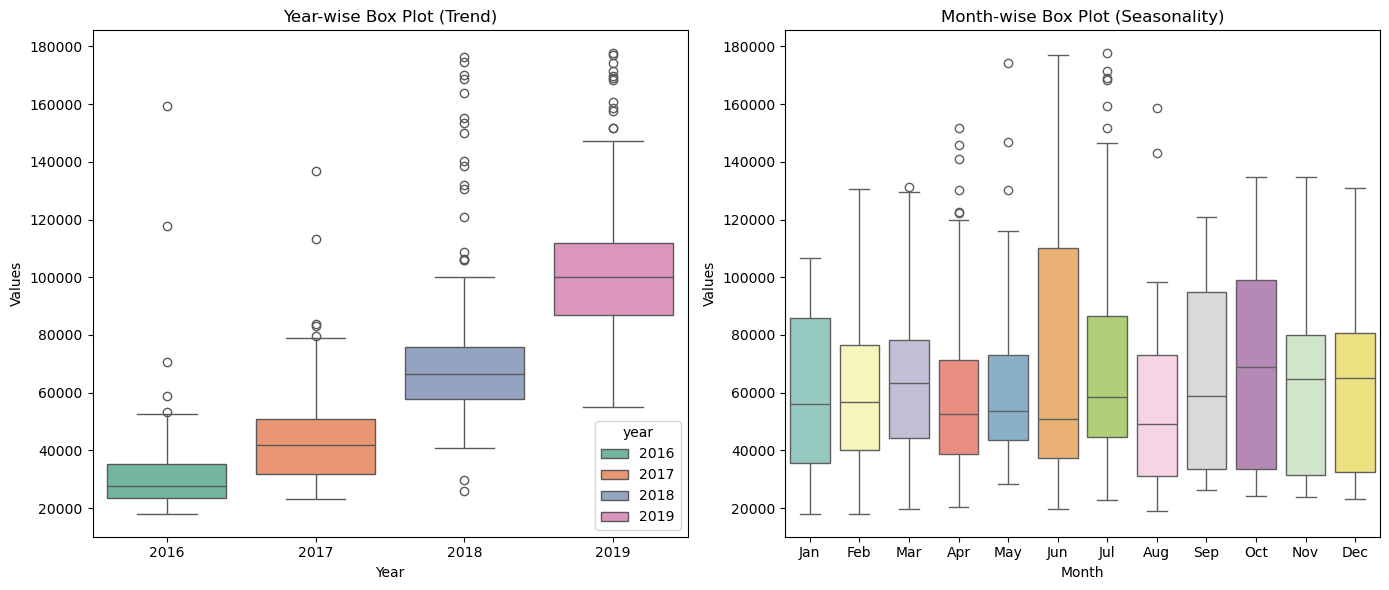

In [16]:
fig= draw_box_plot()
plt.show()